In [85]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [86]:
img = cv2.imread('./field.jpg')
img_copy = np.copy(img)

In [87]:
img.shape

(426, 640, 3)

In [88]:
#create empty image for pasting results
img_marker = np.zeros(img.shape[:2], dtype=np.int32)
segments = np.zeros(img.shape, dtype=np.uint8)

In [89]:
from matplotlib import cm

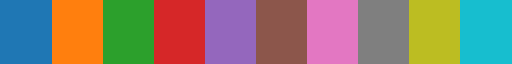

In [90]:
cm.tab10

In [91]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [92]:
cm.tab10(0)[:3]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [93]:
#create a function
def create_color(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [94]:
colors = []
for i in range(20):
    colors.append(create_color(i))

In [95]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0),
 (23.0, 190.0, 207.0)]

In [96]:
##Global variables
n_markers = 20
current_marker = 1
marks_updated = False

In [97]:
#callback function
def mouse_callback(event, x, y, flags, param):
    global marks_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        #markers paassed to watershed algo
        cv2.circle(img_marker, (x,y), 10, (current_marker), -1)

        #what user sees on the img
        cv2.circle(img_copy, (x,y), 10, colors[current_marker], -1)

        marks_updated = True

In [98]:
#while true loop
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_callback)

while True:

    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Image', img_copy)

    #for closing windows
    k = cv2.waitKey(1)
    if k == 27:
        break

    #clearing all colors on pressing C key
    elif k == ord('c'):
        img_copy = img.copy()
        img_marker = np.zeros(img.shape[:2], dtype=np.int32)
        segments = np.zeros(img.shape, dtype=np.uint8)
    
    #update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
    
    #update color marking
    if marks_updated:
        img_marker_copy = img_marker.copy()
        cv2.watershed(img, img_marker_copy)

        segments = np.zeros(img.shape, dtype=np.uint8)

        for color_index in range(n_markers):
            segments[img_marker_copy==(color_index)] = colors[color_index]

cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x19a25d00) is not the object's thread (0x199c8d60).
Cannot move to target thread (0x19a25d00)

QObject::moveToThread: Current thread (0x19a25d00) is not the object's thread (0x199c8d60).
Cannot move to target thread (0x19a25d00)

QObject::moveToThread: Current thread (0x19a25d00) is not the object's thread (0x199c8d60).
Cannot move to target thread (0x19a25d00)

QObject::moveToThread: Current thread (0x19a25d00) is not the object's thread (0x199c8d60).
Cannot move to target thread (0x19a25d00)

QObject::moveToThread: Current thread (0x19a25d00) is not the object's thread (0x199c8d60).
Cannot move to target thread (0x19a25d00)

QObject::moveToThread: Current thread (0x19a25d00) is not the object's thread (0x199c8d60).
Cannot move to target thread (0x19a25d00)

QObject::moveToThread: Current thread (0x19a25d00) is not the object's thread (0x199c8d60).
Cannot move to target thread (0x19a25d00)

QObject::moveToThread: Current thread (0x19a25d00) is n